In [1]:
import snsims

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import healpy as hp

In [4]:
import numpy as np

In [5]:
NSIDE=4

In [6]:
theta_c, phi_c = hp.pix2ang(nside=NSIDE, ipix=1, nest=True)

In [7]:
print(theta_c, phi_c)

(1.2309594173407747, 0.98174770424681024)


This is a radius of a circle with the same are as the tile

In [37]:
rad = np.sqrt(hp.nside2pixarea(NSIDE, degrees=True)/ np.pi)

In [38]:
rng = np.random.RandomState(1)

In [39]:
phi_, theta_ = snsims.Tiling.samplePatchOnSphere(np.degrees(phi_c), np.degrees(theta_c), delta=rad, size=1000, 
                                                 rng=rng, degrees=False)

The tileIDs of the samples from the circle are both inside and outside the tile

In [41]:
np.unique(hp.ang2pix(NSIDE,theta_, phi_, nest=True))

array([ 0,  1,  3,  4, 91])

In [42]:
import opsimsummary as oss

In [43]:
import os

In [44]:
datadir = os.path.join(oss.__path__[0], 'example_data')
opsimdb = os.path.join(datadir, 'enigma_1189_micro.db')

In [45]:
hpOpSim = oss.HealPixelizedOpSim.fromOpSimDB(opsimdb, NSIDE=NSIDE)

 reading from database sqlite:////Users/rbiswas/.local/lib/python2.7/site-packages/opsimsummary/example_data/enigma_1189_micro.db
SELECT * FROM Summary WHERE PROPID in (366, 364)


In [46]:
hpTiles = snsims.HealpixTiles(nside=NSIDE, healpixelizedOpSim=hpOpSim)

This provides samples which are all on the tile, but the number of the samples could be small since 

In [53]:
Phi_, Theta_ = hpTiles._angularSamples(np.degrees(phi_c), 
                                       np.degrees(theta_c), 
                                       radius=rad,
                                       numSamples=100000,
                                       tileID=1,
                                       rng=np.random.RandomState(1))

In [54]:
len(Phi_)

74824

In [55]:
np.unique(hp.ang2pix(NSIDE, Theta_, Phi_, nest=True))

array([1])

In [63]:
p, t = hpTiles.positions(1, 100000, rng=np.random.RandomState(1))

In [64]:
len(p)

100000

In [65]:
np.radians(p[:len(Phi_)]) == Phi_

array([False, False, False, ..., False, False, False], dtype=bool)

In [35]:
np.unique(hp.ang2pix(NSIDE, np.radians(t), np.radians(p), nest=True))

array([1])

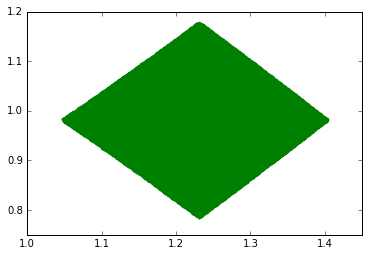

In [66]:
fig, ax = plt.subplots()
#_ = ax.scatter(theta_, phi_)
#_ = ax.plot(Theta_, Phi_, 'rs')
_ = ax.plot(np.radians(t), np.radians(p), '.g')

In [67]:
x= np.arange(0., 1.4, 0.1)

In [68]:
mapvalues = np.ones(hp.nside2npix(NSIDE)) * hp.UNSEEN
mapvalues[1] = 1.

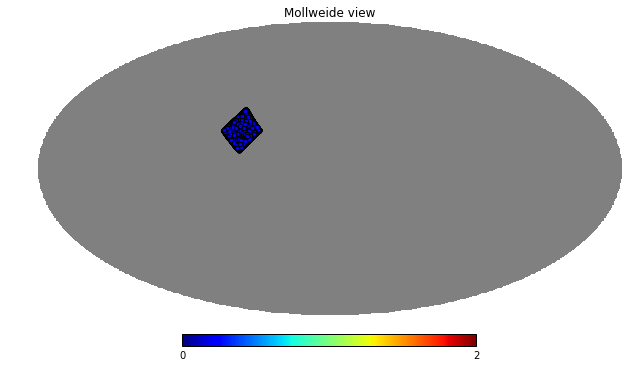

In [71]:
hp.mollview(mapvalues, nest=True)
#hp.projscatter(theta_c, phi_c)
# hp.projscatter(Theta_, Phi_)
hp.projscatter(np.radians(t), np.radians(p))

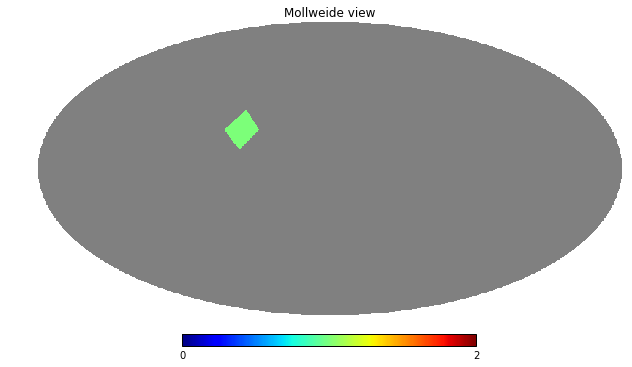

In [72]:
hp.mollview(mapvalues, nest=True)

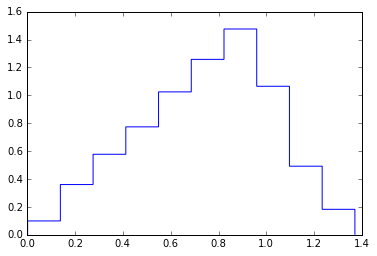

In [25]:
fig, ax = plt.subplots()
_ = ax.hist(np.degrees(np.arccos(np.dot(hp.ang2vec(theta_, phi_), hp.ang2vec(theta_c, phi_c)))), 
            bins=10, histtype='step', normed=1)